In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pd.set_option('display.float_format', lambda x: '%.5f' % x)
# pd.options.display.float_format = '{:,.2f}'.format

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_stata("/users/quasar/downloads/Dataset/Master_thesis_data/JEDC_dataset/10SD_jan15.dta")
df

,Country,Regioncode,Region,Variable,Year,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,SUM
0,BWA,SSA,Sub-saharan Africa,VA,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BWA,SSA,Sub-saharan Africa,VA,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BWA,SSA,Sub-saharan Africa,VA,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BWA,SSA,Sub-saharan Africa,VA,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BWA,SSA,Sub-saharan Africa,VA,1964,16.30,3.49,0.74,0.10,0.66,6.24,1.66,1.12,4.82,2.34,37.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7551,EGY,MENA,Middle East and North Africa,EMP,2008,"5,225.14",31.98,"2,500.13",289.87,"2,376.25","2,814.70","1,806.55",749.22,"5,246.05",NaN,"21,039.90"
7552,EGY,MENA,Middle East and North Africa,EMP,2009,"5,218.60",30.56,"2,541.43",301.08,"2,662.40","3,012.24","1,898.16",784.55,"5,414.84",NaN,"21,863.86"
7553,EGY,MENA,Middle East and North Africa,EMP,2010,"5,205.53",29.00,"2,435.55",307.27,"2,732.95","2,977.06","1,992.27",801.30,"5,538.95",NaN,"22,019.88"
7554,EGY,MENA,Middle East and North Africa,EMP,2011,"5,185.92",27.56,"2,373.81",318.00,"2,795.26","3,020.24","2,048.33",814.74,"5,635.52",NaN,"22,219.39"


In [3]:
df.set_index(['Country','Year']).head()

Regioncode              Region Variable   AGR  MIN  MAN   PU  CON  WRT  TRA  FIRE  GOV  OTH   SUM
Country Year                                                                                                  
BWA     1960        SSA  Sub-saharan Africa       VA   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN
        1961        SSA  Sub-saharan Africa       VA   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN
        1962        SSA  Sub-saharan Africa       VA   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN
        1963        SSA  Sub-saharan Africa       VA   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN
        1964        SSA  Sub-saharan Africa       VA 16.30 3.49 0.74 0.10 0.66 6.24 1.66  1.12 4.82 2.34 37.48

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2841/2892954516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VA['agri'] = df_VA.AGR
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2841/2892954516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VA['manufacturing'] = df_VA.MIN + df_VA.MAN + df_VA.CON
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2841/2892954516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


<AxesSubplot:title={'center':'India Labour share'}, xlabel='Year'>

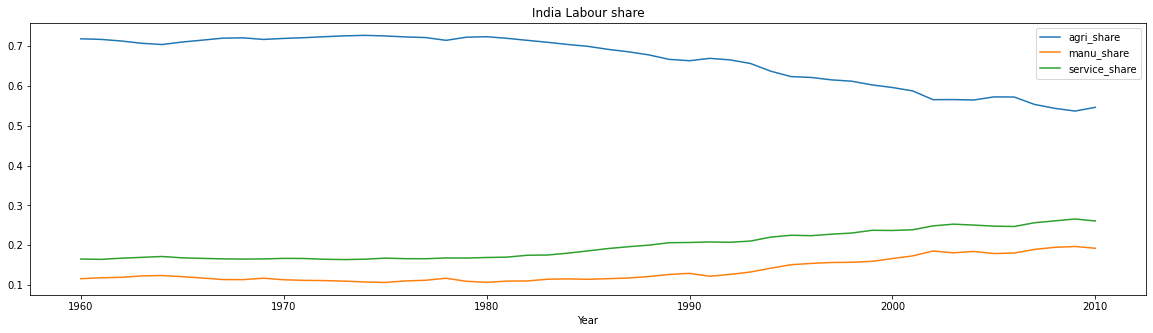

In [4]:
df_emp = df.loc[df.Variable == 'EMP']
df_VA = df.loc[df.Variable == 'VA']

df_VA['agri'] = df_VA.AGR
df_VA['manufacturing'] = df_VA.MIN + df_VA.MAN + df_VA.CON 
df_VA['service'] = df_VA.PU + df_VA.WRT + df_VA.TRA + df_VA.FIRE + df_VA.GOV + df_VA.OTH
df_VA['agri_share'] = df_VA.AGR / df_VA.SUM
df_VA['manu_share'] = df_VA.manufacturing / df_VA.SUM
df_VA['service_share'] = df_VA.service / df_VA.SUM

df_emp['agri'] = df_emp.AGR
df_emp['manufacturing'] = df_emp.MIN + df_emp.MAN + df_emp.CON 
df_emp['service'] = df_emp.PU + df_emp.WRT + df_emp.TRA + df_emp.FIRE + df_emp.GOV + df_emp.OTH
df_emp['agri_share'] = df_emp.AGR / df_emp.SUM
df_emp['manu_share'] = df_emp.manufacturing / df_emp.SUM
df_emp['service_share'] = df_emp.service / df_emp.SUM

df_emp_ind = df_emp.loc[(df_emp['Country'] == 'IND') & (df_emp['Year'] >= 1960) & (df_emp['Year'] <=2015)]
df_emp_ind = df_emp_ind.set_index('Year')
df_emp_ind.head()

df_emp_ind[['agri_share', 'manu_share', 'service_share']].plot(figsize = (20, 5), title= 'India Labour share')

In [5]:
df_emp = df.loc[df.Variable == 'EMP']
df_VA = df.loc[df.Variable == 'VA']

df_VA['agri'] = df_VA.AGR
df_VA['manufacturing'] = df_VA.MIN + df_VA.MAN
df_VA['service'] = df_VA.PU + df_VA.CON + df_VA.WRT + df_VA.TRA + df_VA.FIRE + df_VA.GOV + df_VA.OTH
df_VA['agri_share'] = df_VA.AGR / df_VA.SUM
df_VA['manu_share'] = df_VA.manufacturing / df_VA.SUM
df_VA['service_share'] = df_VA.service / df_VA.SUM

df_emp['agri'] = df_emp.AGR
df_emp['manufacturing'] = df_emp.MIN + df_emp.MAN
df_emp['service'] = df_emp.PU + df_emp.CON + df_emp.WRT + df_emp.TRA + df_emp.FIRE + df_emp.GOV + df_emp.OTH
df_emp['agri_share'] = df_emp.AGR / df_emp.SUM
df_emp['manu_share'] = df_emp.manufacturing / df_emp.SUM
df_emp['service_share'] = df_emp.service / df_emp.SUM

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2841/1146145816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VA['agri'] = df_VA.AGR
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2841/1146145816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VA['manufacturing'] = df_VA.MIN + df_VA.MAN
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2841/1146145816.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [6]:
df_emp_ind = df_emp.loc[(df_emp['Country'] == 'IND') & (df_emp['Year'] >= 1960) & (df_emp['Year'] <=2015)]
df_emp_ind = df_emp_ind.set_index('Year')
df_emp_ind.head()

,Country,Regioncode,Region,Variable,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,SUM,agri,manufacturing,service,agri_share,manu_share,service_share
Year,,,,,,,,,,,,,,,,,,,,,
1960,IND,ASI,Asia,EMP,"126,807.64",907.59,"16,923.06",257.62,"2,625.77","8,273.98","3,076.33",408.52,"13,703.37","3,438.51","176,422.39","126,807.64","17,830.66","31,784.10",0.72,0.10,0.18
1961,IND,ASI,Asia,EMP,"127,487.76",928.42,"17,519.79",284.84,"2,567.62","8,502.21","3,236.66",444.28,"13,191.91","3,576.04","177,739.52","127,487.76","18,448.21","31,803.56",0.72,0.10,0.18
1962,IND,ASI,Asia,EMP,"127,795.00","1,001.40","17,874.32",308.51,"2,508.45","8,616.45","3,424.72",477.43,"13,443.18","3,724.88","179,174.36","127,795.00","18,875.73","32,503.63",0.71,0.11,0.18
1963,IND,ASI,Asia,EMP,"127,848.76",992.38,"18,569.53",351.30,"2,645.97","8,887.39","3,569.26",510.69,"13,454.57","3,867.22","180,697.06","127,848.76","19,561.90","33,286.40",0.71,0.11,0.18
1964,IND,ASI,Asia,EMP,"128,389.21",972.54,"18,915.13",370.98,"2,697.19","9,203.33","3,686.53",546.46,"13,465.70","4,034.97","182,282.04","128,389.21","19,887.68","34,005.15",0.70,0.11,0.19


<AxesSubplot:title={'center':'India Labour share'}, xlabel='Year'>

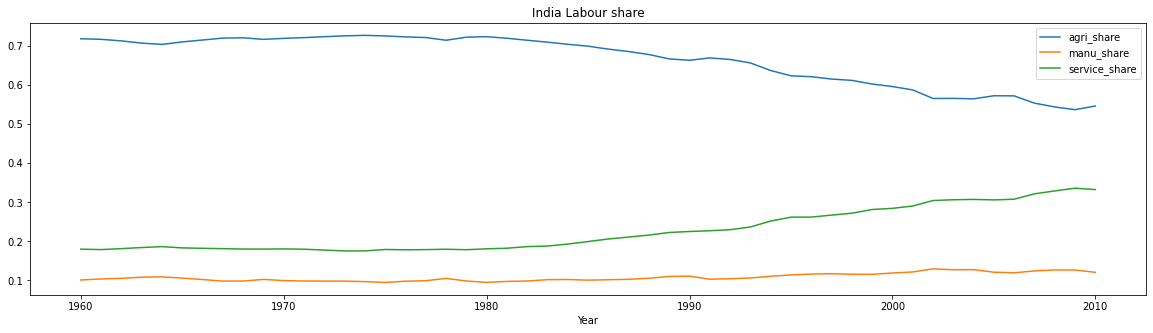

In [7]:
df_emp_ind[['agri_share', 'manu_share', 'service_share']].plot(figsize = (20, 5), title= 'India Labour share')

In [8]:
df_VA_ind = df_VA.loc[(df_VA['Country'] == 'IND') & (df_VA['Year'] >= 1960) & (df_VA['Year'] <= 2015)]
df_VA_ind = df_VA_ind.set_index('Year')

In [9]:
df_VA_Q05 = df.loc[df.Variable == 'VA_Q05']
df_VA_Q05_ind = df_VA_Q05.loc[(df_VA_Q05['Country'] == 'IND') & (df_VA_Q05['Year'] >= 1960) & (df_VA_Q05['Year'] <= 2015)]
df_VA_Q05_ind = df_VA_Q05_ind.set_index('Year')
df_VA_Q05_ind.head()

df_VA_Q05_ind['agri_const'] = df_VA_Q05_ind.AGR
df_VA_Q05_ind['manufacturing_const'] = df_VA_Q05_ind.MIN + df_VA_Q05_ind.MAN
df_VA_Q05_ind['service_const'] = df_VA_Q05_ind.PU + df_VA_Q05_ind.CON + df_VA_Q05_ind.WRT + df_VA_Q05_ind.TRA + df_VA_Q05_ind.FIRE + df_VA_Q05_ind.GOV + df_VA_Q05_ind.OTH
df_VA_Q05_ind['agri_share_const'] = df_VA_Q05_ind.AGR / df_VA_Q05_ind.SUM
df_VA_Q05_ind['manu_share_const'] = df_VA_Q05_ind.manufacturing_const / df_VA_Q05_ind.SUM
df_VA_Q05_ind['service_share_const'] = df_VA_Q05_ind.service_const / df_VA_Q05_ind.SUM

agri_productivity_ind_constant =  (df_VA_Q05_ind['agri_const'] * 1000000) / (df_emp_ind['agri'] * 1000) 
manu_productivity_ind_constant =  (df_VA_Q05_ind['manufacturing_const'] * 1000000) / (df_emp_ind['manufacturing'] * 1000) 
service_productivity_ind_constant =  (df_VA_Q05_ind['service_const'] * 1000000) / (df_emp_ind['service'] * 1000) 

ind_prod_const = pd.DataFrame([agri_productivity_ind_constant, 
                              manu_productivity_ind_constant, 
                              service_productivity_ind_constant])
ind_prod_const = ind_prod_const.T
ind_prod_const.head()

,0,1,2
Year,,,
1960,"16,547.35","31,301.77","41,738.96"
1961,"16,472.96","32,691.15","44,025.22"
1962,"16,106.46","34,525.58","45,816.59"
1963,"16,476.21","36,083.67","48,484.47"
1964,"17,920.39","37,620.67","50,878.16"


In [10]:
agri_productivity_ind =  (df_VA_ind['agri'] * 1000000) / (df_emp_ind['agri'] * 1000) 
manu_productivity_ind =  (df_VA_ind['manufacturing'] * 1000000) / (df_emp_ind['manufacturing'] * 1000) 
service_productivity_ind =  (df_VA_ind['service'] * 1000000) / (df_emp_ind['service'] * 1000) 

ind_prod = pd.DataFrame([agri_productivity_ind, manu_productivity_ind, service_productivity_ind])
ind_prod = ind_prod.T
ind_prod.head()

,agri,manufacturing,service
Year,,,
1960,574.91,"1,458.97","1,810.55"
1961,592.30,"1,550.72","1,928.84"
1962,603.28,"1,691.22","2,090.39"
1963,709.73,"1,854.62","2,283.14"
1964,863.53,"2,000.82","2,559.39"


In [11]:
price_ind = pd.DataFrame([agri_productivity_ind, manu_productivity_ind, service_productivity_ind, 
                              agri_productivity_ind_constant, manu_productivity_ind_constant, service_productivity_ind_constant])
price_ind = price_ind.T
price_ind.head()

,agri,manufacturing,service,Unnamed 0,Unnamed 1,Unnamed 2
Year,,,,,,
1960,574.91,"1,458.97","1,810.55","16,547.35","31,301.77","41,738.96"
1961,592.30,"1,550.72","1,928.84","16,472.96","32,691.15","44,025.22"
1962,603.28,"1,691.22","2,090.39","16,106.46","34,525.58","45,816.59"
1963,709.73,"1,854.62","2,283.14","16,476.21","36,083.67","48,484.47"
1964,863.53,"2,000.82","2,559.39","17,920.39","37,620.67","50,878.16"


In [12]:
price_ind['agri_price'] = price_ind['agri'] / price_ind['Unnamed 0']
price_ind['manu_price'] = price_ind['manufacturing'] / price_ind['Unnamed 1']
price_ind['service_price'] = price_ind['service'] / price_ind['Unnamed 2']
price_ind.head()

,agri,manufacturing,service,Unnamed 0,Unnamed 1,Unnamed 2,agri_price,manu_price,service_price
Year,,,,,,,,,
1960,574.91,"1,458.97","1,810.55","16,547.35","31,301.77","41,738.96",0.03,0.05,0.04
1961,592.30,"1,550.72","1,928.84","16,472.96","32,691.15","44,025.22",0.04,0.05,0.04
1962,603.28,"1,691.22","2,090.39","16,106.46","34,525.58","45,816.59",0.04,0.05,0.05
1963,709.73,"1,854.62","2,283.14","16,476.21","36,083.67","48,484.47",0.04,0.05,0.05
1964,863.53,"2,000.82","2,559.39","17,920.39","37,620.67","50,878.16",0.05,0.05,0.05


In [13]:
price_ind[['agri_price', 'manu_price', 'service_price']].pct_change().mean()

agri_price      0.08
manu_price      0.07
service_price   0.07
dtype: float64

In [14]:
pa_pm = price_ind.loc[(price_ind.index  >= 1983) & (price_ind.index <= 2004)]['agri_price'].pct_change()/ price_ind.loc[(price_ind.index  >= 1983) & (price_ind.index <= 2004)]['manu_price'].pct_change()
pa_pm.mean()

1.2535120016836399

In [15]:
ps_pm = price_ind.loc[(price_ind.index  >= 1983) & (price_ind.index <= 2004)]['service_price'].pct_change()/ price_ind.loc[(price_ind.index  >= 1983) & (price_ind.index <= 2004)]['manu_price'].pct_change()
ps_pm.mean() 

1.2209395309166302

<AxesSubplot:title={'center':'Sectoral Productivity India'}, xlabel='Year'>

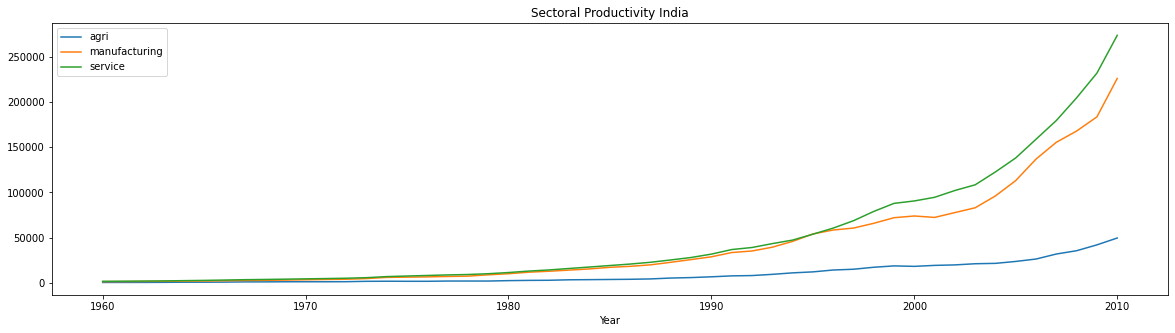

In [16]:
ind_prod.plot(figsize =(20, 5), title ='Sectoral Productivity India')

In [17]:
import seaborn as sns
sns.set_theme(style="darkgrid")

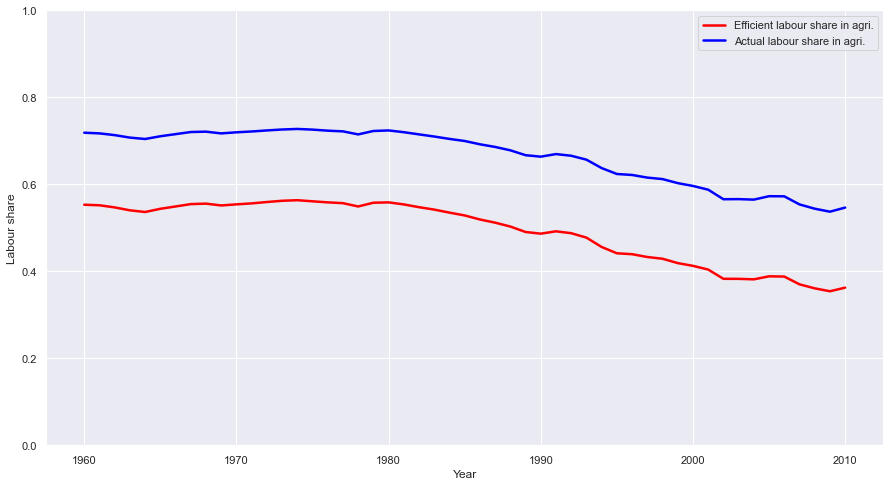

In [18]:
# use human capital ratio from table 1 to calculate values below 
df_ind_eff = df_emp.loc[(df_emp['Country'] == 'IND') & (df_emp['Year'] >= 1960) & (df_emp['Year'] <= 2015), ['Year', 'AGR', 'MIN','MAN','PU','CON','WRT','TRA','FIRE','GOV','OTH','agri_share']]
df_ind_eff['agri_eff'] = df_ind_eff.AGR
df_ind_eff['manufacturing_eff'] = (df_ind_eff.MIN + df_ind_eff.MAN) * 1.68
df_ind_eff['service_eff'] = (df_ind_eff.PU + df_ind_eff.CON + df_ind_eff.WRT + df_ind_eff.TRA + df_ind_eff.FIRE + df_ind_eff.GOV + df_ind_eff.OTH) * 2.28 
df_ind_eff['total_eff'] = df_ind_eff['agri_eff'] + df_ind_eff['manufacturing_eff'] + df_ind_eff['service_eff']
df_ind_eff['agri_share_eff'] = df_ind_eff.agri_eff / df_ind_eff.total_eff
df_ind_eff['manu_share_eff'] = df_ind_eff.manufacturing_eff / df_ind_eff.total_eff
df_ind_eff['service_share_eff'] = df_ind_eff.service_eff / df_ind_eff.total_eff

plt.figure(figsize=(15,8))
sns.lineplot(x="Year", y="agri_share_eff", data= df_ind_eff, 
             color = 'red', linewidth = 2.5, dashes=[(2,2)], label = 'Efficient labour share in agri.' )
sns.lineplot(x="Year", y="agri_share", data= df_emp_ind, 
             color = 'blue', linewidth = 2.5, dashes=[(2,2)], label = 'Actual labour share in agri.')
plt.xlabel('Year') 
plt.ylabel('Labour share')     
plt.ylim(0, 1)
plt.show()

In [19]:
df_emp_ind['agri_share']

Year
1960   0.72
1961   0.72
1962   0.71
1963   0.71
1964   0.70
1965   0.71
1966   0.72
1967   0.72
1968   0.72
1969   0.72
1970   0.72
1971   0.72
1972   0.72
1973   0.73
1974   0.73
1975   0.73
1976   0.72
1977   0.72
1978   0.71
1979   0.72
1980   0.72
1981   0.72
1982   0.71
1983   0.71
1984   0.70
1985   0.70
1986   0.69
1987   0.69
1988   0.68
1989   0.67
1990   0.66
1991   0.67
1992   0.67
1993   0.66
1994   0.64
1995   0.62
1996   0.62
1997   0.62
1998   0.61
1999   0.60
2000   0.60
2001   0.59
2002   0.57
2003   0.57
2004   0.56
2005   0.57
2006   0.57
2007   0.55
2008   0.54
2009   0.54
2010   0.55
Name: agri_share, dtype: float64

In [20]:
df_ind_eff.set_index('Year').head()

,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,agri_share,agri_eff,manufacturing_eff,service_eff,total_eff,agri_share_eff,manu_share_eff,service_share_eff
Year,,,,,,,,,,,,,,,,,,
1960,"126,807.64",907.59,"16,923.06",257.62,"2,625.77","8,273.98","3,076.33",408.52,"13,703.37","3,438.51",0.72,"126,807.64","29,955.50","72,467.75","229,230.89",0.55,0.13,0.32
1961,"127,487.76",928.42,"17,519.79",284.84,"2,567.62","8,502.21","3,236.66",444.28,"13,191.91","3,576.04",0.72,"127,487.76","30,992.99","72,512.11","230,992.86",0.55,0.13,0.31
1962,"127,795.00","1,001.40","17,874.32",308.51,"2,508.45","8,616.45","3,424.72",477.43,"13,443.18","3,724.88",0.71,"127,795.00","31,711.22","74,108.27","233,614.50",0.55,0.14,0.32
1963,"127,848.76",992.38,"18,569.53",351.30,"2,645.97","8,887.39","3,569.26",510.69,"13,454.57","3,867.22",0.71,"127,848.76","32,863.99","75,892.99","236,605.74",0.54,0.14,0.32
1964,"128,389.21",972.54,"18,915.13",370.98,"2,697.19","9,203.33","3,686.53",546.46,"13,465.70","4,034.97",0.70,"128,389.21","33,411.30","77,531.75","239,332.26",0.54,0.14,0.32


In [21]:
# from paper
hm_ha = 2.56
hs_ha = 4.17

ind_prod['tau_m'] = 1 - ((ind_prod['agri']/ ind_prod['manufacturing']) * hm_ha)
ind_prod['tau_s'] = 1 - ((ind_prod['agri']/ ind_prod['service']) * hs_ha)
ind_prod.head()

,agri,manufacturing,service,tau_m,tau_s
Year,,,,,
1960,574.91,"1,458.97","1,810.55",-0.01,-0.32
1961,592.30,"1,550.72","1,928.84",0.02,-0.28
1962,603.28,"1,691.22","2,090.39",0.09,-0.20
1963,709.73,"1,854.62","2,283.14",0.02,-0.30
1964,863.53,"2,000.82","2,559.39",-0.10,-0.41


<AxesSubplot:xlabel='Year'>

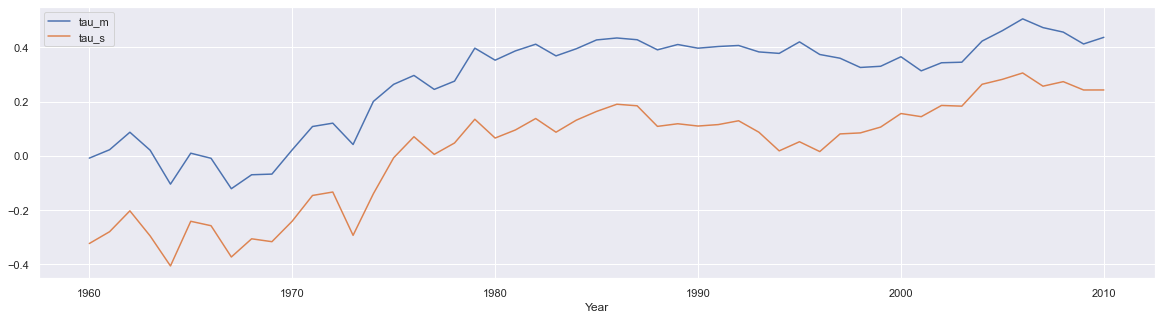

In [22]:
ind_prod[['tau_m', 'tau_s']].plot(figsize = (20, 5))

In [23]:
ind_prod[['agri', 'manufacturing', 'service']].pct_change().mean()

agri            0.09
manufacturing   0.10
service         0.10
dtype: float64

In [24]:
human_cap = pd.read_csv("human_cap.csv", index_col = 0)
human_cap.head()

,agri,ind,service
1960,1.02,1.59,2.23
1961,1.02,1.59,2.23
1962,1.02,1.59,2.23
1963,1.02,1.59,2.23
1964,1.02,1.59,2.23


In [25]:
# from paper
hm_ha = human_cap.ind / human_cap.agri
hs_ha = human_cap.service / human_cap.agri

ind_prod['tau_m'] = 1 - ((ind_prod['agri']/ ind_prod['manufacturing']) * hm_ha)
ind_prod['tau_s'] = 1 - ((ind_prod['agri']/ ind_prod['service']) * hs_ha)
ind_prod.head()

,agri,manufacturing,service,tau_m,tau_s
Year,,,,,
1960,574.91,"1,458.97","1,810.55",0.39,0.31
1961,592.30,"1,550.72","1,928.84",0.41,0.33
1962,603.28,"1,691.22","2,090.39",0.45,0.37
1963,709.73,"1,854.62","2,283.14",0.41,0.32
1964,863.53,"2,000.82","2,559.39",0.33,0.27


<AxesSubplot:xlabel='Year'>

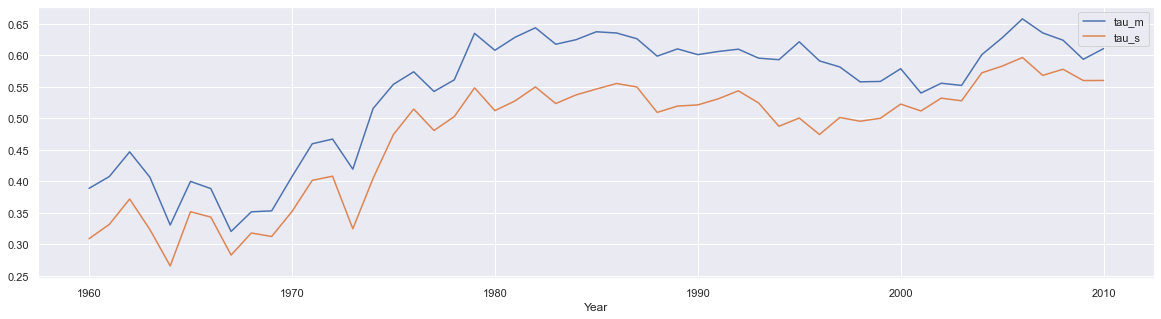

In [26]:
ind_prod[['tau_m', 'tau_s']].plot(figsize = (20, 5))

In [27]:
ind_prod[['tau_m', 'tau_s']].mean(), ind_prod[['tau_m', 'tau_s']].std()

(tau_m   0.54
 tau_s   0.47
 dtype: float64,
 tau_m   0.10
 tau_s   0.09
 dtype: float64)

In [28]:
ind_prod['tau_m_unadj'] = 1 - ((ind_prod['agri']/ ind_prod['manufacturing']))
ind_prod['tau_s_unadj'] = 1 - ((ind_prod['agri']/ ind_prod['service']))
ind_prod

,agri,manufacturing,service,tau_m,tau_s,tau_m_unadj,tau_s_unadj
Year,,,,,,,
1960,574.91,"1,458.97","1,810.55",0.39,0.31,0.61,0.68
1961,592.30,"1,550.72","1,928.84",0.41,0.33,0.62,0.69
1962,603.28,"1,691.22","2,090.39",0.45,0.37,0.64,0.71
1963,709.73,"1,854.62","2,283.14",0.41,0.32,0.62,0.69
1964,863.53,"2,000.82","2,559.39",0.33,0.27,0.57,0.66
1965,845.89,"2,186.01","2,839.90",0.40,0.35,0.61,0.70
1966,968.69,"2,456.77","3,210.04",0.39,0.34,0.61,0.70
1967,"1,193.32","2,723.42","3,621.99",0.32,0.28,0.56,0.67
1968,"1,217.82","2,913.09","3,886.33",0.35,0.32,0.58,0.69


In [29]:
ind_prod = ind_prod.iloc[0:51]
ind_prod

,agri,manufacturing,service,tau_m,tau_s,tau_m_unadj,tau_s_unadj
Year,,,,,,,
1960,574.91,"1,458.97","1,810.55",0.39,0.31,0.61,0.68
1961,592.30,"1,550.72","1,928.84",0.41,0.33,0.62,0.69
1962,603.28,"1,691.22","2,090.39",0.45,0.37,0.64,0.71
1963,709.73,"1,854.62","2,283.14",0.41,0.32,0.62,0.69
1964,863.53,"2,000.82","2,559.39",0.33,0.27,0.57,0.66
1965,845.89,"2,186.01","2,839.90",0.40,0.35,0.61,0.70
1966,968.69,"2,456.77","3,210.04",0.39,0.34,0.61,0.70
1967,"1,193.32","2,723.42","3,621.99",0.32,0.28,0.56,0.67
1968,"1,217.82","2,913.09","3,886.33",0.35,0.32,0.58,0.69


In [30]:
# use for 5 equation and 5 unknown solution 
from sympy.core.symbol import symbols
from sympy.solvers.solveset import nonlinsolve

# data for 1980 

# from literature  
lambda_a = 0.1
lambda_m = 0.15
lambda_s = 0.75
rho = 0.5

# from calculation in paper for 1960 - formula is given in paper - follow difference procedure for India comparing US
tau_m = 0.39
tau_s = 0.31

pa_pm_data = 0.03/0.05
ps_pm_data = 0.04/0.05

#0.55	0.13	0.32
n_a = 0.55
n_m = 0.13
n_s = 0.32

ca_bar, cs_bar, A_a, A_m, A_s = symbols('ca_bar, cs_bar, A_a, A_m, A_s', real=True)

# equal to zero below 
nonlinsolve([ 
          pa_pm_data - ((1 - tau_m) * (A_m/A_a)), 
          ps_pm_data - (((1-tau_m)/(1-tau_s)) * (A_m/A_s)), 
          #((A_a * n_a - ca_bar) / (A_m * n_m)) - ((lambda_a / lambda_m) * (1/pa_pm_data)**rho),
          #((A_s * n_s + cs_bar) / (A_m * n_m)) - ((lambda_s / lambda_m) * (1/ps_pm_data)**rho),
          
          ((A_a*n_a-ca_bar) / (A_m * n_m)) - ((lambda_a/lambda_m) * ((A_a/A_m)/(1-tau_m))**rho), 
          ((A_s*n_s+cs_bar) / (A_m * n_m)) - ((lambda_s/lambda_m) * ((A_s*(1-tau_s)) / (A_m *(1-tau_m)))**rho),
          # n_a - (ca_bar/A_a) - ( (1 + (cs_bar/A_s) - (ca_bar/A_a)) / ( 1 + ((lambda_m/lambda_a) * ((1 - tau_m)**rho) * ((A_a/A_m)**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) * ((A_a/A_s)**(1-rho))))),
          n_a + n_m + n_s - 1,
          # n_a - (ca_bar/A_a) - ((1 + (cs_bar / A_s) - (ca_bar/ A_a)) / (1 + ( (lambda_m/lambda_a) * ((1 - tau_m)**rho) * ((A_a/A_m)**(1-rho)) ) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) * ((A_a/A_s)**(1-rho))))),
          ],  
          [ca_bar, cs_bar, A_a, A_m, A_s])

{(1.19882550170111*cs_bar, cs_bar, 2.72492536161198*cs_bar, 2.68025445404457*cs_bar, 2.9618753930565*cs_bar)}

In [31]:
df_ind_eff = df_ind_eff.set_index('Year')

In [32]:
A_a = 3.9398654620738 * 1552.7 
A_m = 2.34051413588543 * 1552.7
A_s = 2.23855992163284 * 1552.7

ca_bar, cs_bar, A_a, A_m, A_s = symbols('ca_bar, cs_bar, A_a, A_m, A_s', real=True)

# equal to zero below 
nonlinsolve([ 
          pa_pm_data - ((1 - tau_m) * (A_m/A_a)), 
          ps_pm_data - (((1 - tau_m)/(1- tau_s)) * (A_m/A_s)), 
          ((A_a * n_a - ca_bar) / (A_m * n_m)) - ((lambda_a / lambda_m) * (1/pa_pm_data)**rho),
          ((A_s * n_s + cs_bar) / (A_m * n_m)) - ((lambda_s / lambda_m) * (1/ps_pm_data)**rho),
          
          #((A_a * n_a - ca_bar) / (A_m * n_m)) - ( (lambda_a / lambda_m) * ( ( A_a /A_m)/(1-tau_m) )**rho ), 
          #((A_s * n_s + cs_bar) / (A_m * n_m)) - ( (lambda_s / lambda_m) * ( ( A_s * (1-tau_s)) / (A_m *(1-tau_m)) )**rho ),
          # n_a - (ca_bar/A_a) - ( (1 + (cs_bar/A_s) - (ca_bar/A_a)) / ( 1 + ((lambda_m/lambda_a) * ((1 - tau_m)**rho) * ((A_a/A_m)**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) * ((A_a/A_s)**(1-rho))))),
          n_a + n_m + n_s - 1,
          #n_a - (ca_bar/A_a) - ((1 + (cs_bar / A_s) - (ca_bar/ A_a)) / (1 + ( (lambda_m/lambda_a) * ((1 - tau_m)**rho) * ((A_a/A_m)**(1-rho)) ) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) * ((A_a/A_s)**(1-rho))))),
          ],  
          [ca_bar, cs_bar, A_a, A_m, A_s])

{(1.19882550170111*cs_bar, cs_bar, 2.72492536161198*cs_bar, 2.68025445404457*cs_bar, 2.9618753930565*cs_bar)}

In [33]:
cs_bar = 1552.7
ca_bar = cs_bar*1.19882550170111
A_a_1960 = cs_bar*2.72492536161198
A_m_1960 = cs_bar*2.68025445404457
A_s_1960 = cs_bar*2.9618753930565
A_a_1960, A_m_1960, A_s_1960

(4230.991608974922, 4161.631090795004, 4598.903922798828)

In [34]:
cs_bar = 1552.7
ca_bar = cs_bar*1.19882550170111

A_a, A_m, A_s = symbols('A_a, A_m, A_s', real=True)

n_a = df_ind_eff.agri_share_eff
n_m = df_ind_eff.manu_share_eff
n_s = df_ind_eff.service_share_eff

tau_m = ind_prod.tau_m
tau_s = ind_prod.tau_s

pa_pm_data = price_ind.agri_price / price_ind.manu_price
ps_pm_data = price_ind.service_price / price_ind.manu_price

parameters = pd.DataFrame(index=df_ind_eff.index, columns = ['A_a', 'A_m', 'A_s'])
parameters.iloc[0]['A_a'] = A_a_1960
parameters.iloc[0]['A_m'] = A_m_1960
parameters.iloc[0]['A_s'] = A_s_1960

# equal to zero below 

for i in range(1, len(df_ind_eff.index)):
          parameter = list(nonlinsolve([ 
                    pa_pm_data.iloc[i] - ((1 - tau_m.iloc[i]) * (A_m/A_a)), 
                    ps_pm_data.iloc[i] - (((1 - tau_m.iloc[i])/(1- tau_s.iloc[i])) * (A_m/A_s)),
                    #((A_a * n_a.iloc[i] - ca_bar) / (A_m * n_m.iloc[i])) - ((lambda_a / lambda_m) * ((A_a/A_m)/(1-tau_m.iloc[i]))**rho), 
                    #((A_s * n_s.iloc[i] + cs_bar) / (A_m * n_m.iloc[i])) - ((lambda_s / lambda_m) * ((A_s*(1-tau_s.iloc[i])) / (A_m *(1-tau_m.iloc[i])) )**rho),
                    n_a.iloc[i] - (ca_bar/A_a) - ((1 + (cs_bar / A_s) - (ca_bar/ A_a)) / (1 + ( (lambda_m/lambda_a) * ((1 - tau_m.iloc[i])**rho) * ((A_a/A_m)**(1-rho)) ) + ((lambda_s/lambda_a) * ((1 - tau_s.iloc[i])**rho) * ((A_a/A_s)**(1-rho))))),
                    ],  
                    [A_a, A_m, A_s]))
          print(i)
          parameters.iloc[i]['A_a'] = parameter[0][0]
          parameters.iloc[i]['A_m'] = parameter[0][1]
          parameters.iloc[i]['A_s'] = parameter[0][2]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [35]:
parameters["A_a"] = parameters.A_a.astype(float)
parameters["A_m"] = parameters.A_m.astype(float)
parameters["A_s"] = parameters.A_s.astype(float)

parameters

,A_a,A_m,A_s
Year,,,
1960,"4,230.99","4,161.63","4,598.90"
1961,"4,248.69","5,437.54","5,218.28"
1962,"4,340.68","6,000.50","5,674.43"
1963,"4,376.56","6,181.24","5,918.62"
1964,"4,366.79","5,911.94","5,697.55"
1965,"4,380.56","7,105.60","6,835.29"
1966,"4,327.54","7,514.02","7,257.79"
1967,"4,209.48","6,722.49","6,523.53"
1968,"4,231.25","7,105.72","6,927.57"


<AxesSubplot:xlabel='Year'>

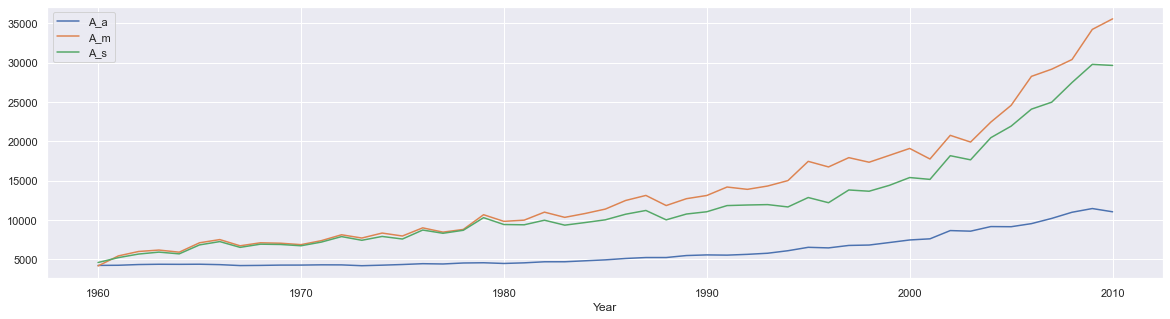

In [54]:
parameters.plot(figsize=(20,5))

<AxesSubplot:xlabel='Year'>

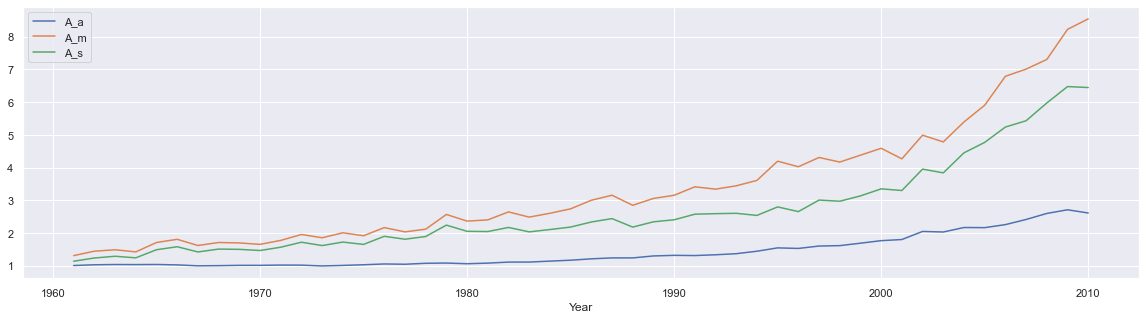

In [56]:
(1+ parameters.pct_change()).cumprod().plot(figsize=(20,5))
plt.title("Annual sectoral TFP growth rate")

In [37]:
np.sqrt(1/3), np.sqrt(1/2) 
(1/3)**2, (1/2)**2

(0.1111111111111111, 0.25)

In [38]:
parameters.pct_change()

,A_a,A_m,A_s
Year,,,
1960,NaN,NaN,NaN
1961,0.00,0.31,0.13
1962,0.02,0.10,0.09
1963,0.01,0.03,0.04
1964,-0.00,-0.04,-0.04
1965,0.00,0.20,0.20
1966,-0.01,0.06,0.06
1967,-0.03,-0.11,-0.10
1968,0.01,0.06,0.06


<AxesSubplot:xlabel='Year'>

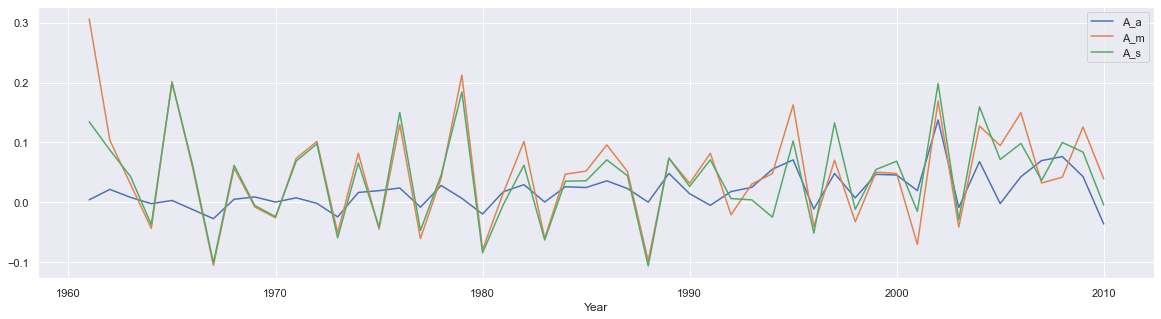

In [39]:
parameters.pct_change().plot(figsize=(20,5))

In [40]:
parameters.pct_change().mean()

A_a   0.02
A_m   0.05
A_s   0.04
dtype: float64

In [41]:
n_a_calc = pd.DataFrame(index=df_ind_eff.index, columns = ['agri_share_calc', 'const_agri_TFP', 'const_non_agri_TFP', 'tau_m_s_zero', 'tau_m_s_constant','data'])

n_a_calc.iloc[0]['agri_share_calc'] = df_ind_eff.loc[1960]['agri_share_eff']
for i in range(1, len(df_ind_eff.index)):
          term_1 = (1 + (cs_bar / parameters.iloc[i]['A_s']) - (ca_bar/ parameters.iloc[i]['A_a']))
          term_2 = ca_bar / parameters.iloc[i]['A_a']
          term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m.iloc[i])**rho )*((parameters.iloc[i]['A_a']/parameters.iloc[i]['A_m'])**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s.iloc[i])**rho) *((parameters.iloc[i]['A_a']/parameters.iloc[i]['A_s'])**(1-rho)))
          n_a = (term_1 / term_3) + term_2
          n_a_calc.iloc[i]['agri_share_calc'] = n_a

In [42]:
# Constant agri TFP
# A_a = parameters.iloc[1]['A_a']
n_a_calc.iloc[0]['const_agri_TFP'] = df_ind_eff.loc[1960]['agri_share_eff']
for i in range(1, len(df_ind_eff.index)):
          term_1 = (1 + (cs_bar / parameters.iloc[i]['A_s']) - (ca_bar/ parameters.iloc[0]['A_a']))
          term_2 = ca_bar / parameters.iloc[0]['A_a']
          term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m.iloc[i])**rho )*((parameters.iloc[0]['A_a']/parameters.iloc[i]['A_m'])**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s.iloc[i])**rho) *((parameters.iloc[0]['A_a']/parameters.iloc[i]['A_s'])**(1-rho)))
          n_a = (term_1 / term_3) + term_2
          n_a_calc.iloc[i]['const_agri_TFP'] = n_a

In [43]:
# Constant non-agri TFP
n_a_calc.iloc[0]['const_non_agri_TFP'] = df_ind_eff.loc[1960]['agri_share_eff']
for i in range(1, len(df_ind_eff.index)):
          term_1 = (1 + (cs_bar / parameters.iloc[0]['A_s']) - (ca_bar/ parameters.iloc[i]['A_a']))
          term_2 = ca_bar / parameters.iloc[i]['A_a']
          term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m.iloc[i])**rho)*((parameters.iloc[i]['A_a']/parameters.iloc[0]['A_m'])**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s.iloc[i])**rho) *((parameters.iloc[i]['A_a']/parameters.iloc[0]['A_s'])**(1-rho)))
          n_a = (term_1 / term_3) + term_2
          n_a_calc.iloc[i]['const_non_agri_TFP'] = n_a

In [44]:
# tau_m = 0 and tau_s = 0 case
n_a_calc.iloc[0]['tau_m_s_zero'] = df_ind_eff.loc[1960]['agri_share_eff']
for i in range(1, len(df_ind_eff.index)):
          term_1 = (1 + (cs_bar / parameters.iloc[i]['A_s']) - (ca_bar/ parameters.iloc[i]['A_a']))
          term_2 = ca_bar / parameters.iloc[i]['A_a']
          term_3 = 1 + ((lambda_m/lambda_a) * ((1 - 0)**rho)*((parameters.iloc[i]['A_a']/parameters.iloc[i]['A_m'])**(1-rho))) + ((lambda_s/lambda_a) * ((1 - 0)**rho) *((parameters.iloc[i]['A_a']/parameters.iloc[i]['A_s'])**(1-rho)))
          n_a = (term_1 / term_3) + term_2
          n_a_calc.iloc[i]['tau_m_s_zero'] = n_a

In [45]:
# tau_m = 0 and tau_s = 0 case
n_a_calc.iloc[0]['tau_m_s_constant'] = df_ind_eff.loc[1960]['agri_share_eff']
for i in range(1, len(df_ind_eff.index)):
          term_1 = (1 + (cs_bar / parameters.iloc[i]['A_s']) - (ca_bar/ parameters.iloc[i]['A_a']))
          term_2 = ca_bar / parameters.iloc[i]['A_a']
          term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m.iloc[0])**rho)*((parameters.iloc[i]['A_a']/parameters.iloc[i]['A_m'])**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s.iloc[0])**rho) *((parameters.iloc[i]['A_a']/parameters.iloc[i]['A_s'])**(1-rho)))
          n_a = (term_1 / term_3) + term_2
          n_a_calc.iloc[i]['tau_m_s_constant'] = n_a

In [46]:
n_a_calc['data'] = df_ind_eff.agri_share_eff
n_a_calc

,agri_share_calc,const_agri_TFP,const_non_agri_TFP,tau_m_s_zero,tau_m_s_constant,data
Year,,,,,,
1960,0.55,0.55,0.55,0.55,0.55,0.55
1961,0.55,0.55,0.55,0.53,0.55,0.55
1962,0.55,0.56,0.54,0.52,0.54,0.55
1963,0.54,0.55,0.54,0.52,0.54,0.54
1964,0.54,0.55,0.53,0.52,0.54,0.54
1965,0.54,0.56,0.54,0.52,0.54,0.54
1966,0.55,0.56,0.54,0.53,0.55,0.55
1967,0.55,0.55,0.55,0.54,0.56,0.55
1968,0.56,0.56,0.55,0.54,0.56,0.56


In [47]:
n_a_calc = n_a_calc.dropna()

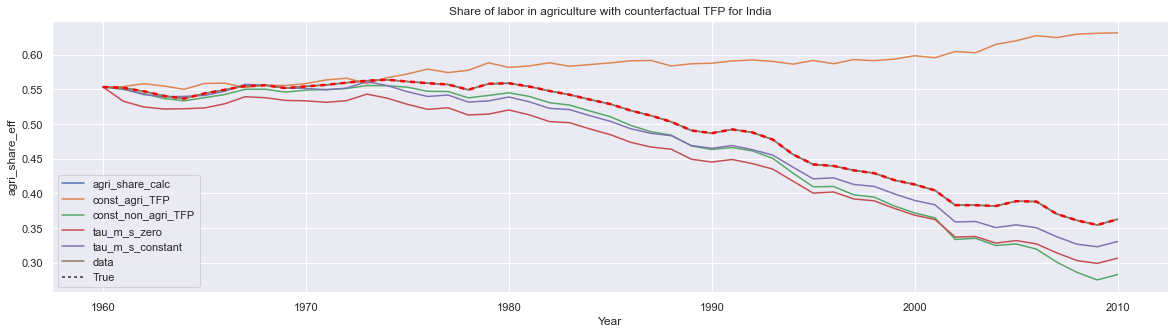

In [48]:
n_a_calc.plot(figsize=(20,5))
plt.title("Share of labor in agriculture with counterfactual TFP for India")
sns.lineplot(x="Year", y="agri_share_eff", data= df_ind_eff, 
             color = 'red', linewidth = 2.5, style=True, dashes=[(2,2)])
plt.show()

In [49]:
"""
# create excel writer
writer = pd.ExcelWriter('/users/quasar/downloads/calibration_result.xlsx')
# write dataframe to excel sheet named 'marks'
parameters.to_excel(writer, 'Sectoral TFP Time Series')
n_a_calc.to_excel(writer, 'Agri Labour share')
# save the excel file
writer.save()
""";

1. Do the entire exercise (JEDC related) with data until recent time point
2. Do the plots setting tau=0 and interpret them as distortion free economy
3. Aggregate growth implication of the counterfactuals

In [50]:
df_emp = df.loc[df.Variable == 'EMP']
df_VA = df.loc[df.Variable == 'VA']

df_VA['agri'] = df_VA.AGR
df_VA['non_agri'] = df_VA.MIN + df_VA.MAN + df_VA.PU + df_VA.CON + df_VA.WRT + df_VA.TRA + df_VA.FIRE + df_VA.GOV + df_VA.OTH
df_VA['agri_share'] = df_VA.AGR / df_VA.SUM
df_VA['non_agri_share'] = df_VA.non_agri / df_VA.SUM

df_emp['agri'] = df_emp.AGR
df_emp['non_agri'] = df_emp.MIN + df_emp.MAN + df_emp.PU + df_emp.CON + df_emp.WRT + df_emp.TRA + df_emp.FIRE + df_emp.GOV + df_emp.OTH
df_emp['agri_share'] = df_emp.AGR / df_emp.SUM
df_emp['non_agri_share'] = df_emp.non_agri / df_emp.SUM

df_emp_ind = df_emp.loc[(df_emp['Country'] == 'IND') & (df_emp['Year'] >= 1960) & (df_emp['Year'] <=2010)]
df_emp_ind = df_emp_ind.set_index('Year')

df_VA_ind = df_VA.loc[(df_VA['Country'] == 'IND') & (df_VA['Year'] >= 1960) & (df_VA['Year'] <= 2010)]
df_VA_ind = df_VA_ind.set_index('Year')

agri_productivity_ind =  (df_VA_ind['agri'] * 1000000) / (df_emp_ind['agri'] * 1000) 
non_agri_productivity_ind =  (df_VA_ind['non_agri'] * 1000000) / (df_emp_ind['non_agri'] * 1000) 

ind_prod = pd.DataFrame([agri_productivity_ind, non_agri_productivity_ind])
ind_prod = ind_prod.T

ind_prod['theta'] = 1 - ((ind_prod['agri']/ ind_prod['non_agri']))
ind_prod

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2841/1321386038.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VA['agri'] = df_VA.AGR
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2841/1321386038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VA['non_agri'] = df_VA.MIN + df_VA.MAN + df_VA.PU + df_VA.CON + df_VA.WRT + df_VA.TRA + df_VA.FIRE + df_VA.GOV + df_VA.OTH
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2841/1321386038.py:6: SettingWithCopyWarning: 


,agri,non_agri,theta
Year,,,
1960,574.91,"1,684.20",0.66
1961,592.30,"1,790.03",0.67
1962,603.28,"1,943.74",0.69
1963,709.73,"2,124.52",0.67
1964,863.53,"2,353.26",0.63
1965,845.89,"2,600.26",0.67
1966,968.69,"2,939.31",0.67
1967,"1,193.32","3,306.16",0.64
1968,"1,217.82","3,542.68",0.66


In [51]:
La_N = df_emp_ind.agri_share 
Ya_La = ind_prod.agri 
# create theta (similar to tau for agri vs non-agri)
theta = ind_prod.theta
alpha = 0.4 # from paper 
sigma = 0.5 # for India assumed as for US = 0.7 (from literature)

def func(X, a, a_bar):
          Ya_La, theta = X 
          term_1 = a_bar / Ya_La
          term_2 = (((1-a)*(1-theta)) / ((a*(1-alpha)*sigma) + ((1-(a*(1-alpha)))*(1-theta))))
          term_3 = ((a*(1-alpha)*sigma) / ((a*(1-alpha)*sigma) + ((1-(a*(1-alpha)))*(1-theta))))
          La_N_calc = (term_2 * term_1) + term_3
          return La_N_calc

In [52]:
parameters, covariance = curve_fit(func, (Ya_La, theta), La_N, bounds=([0, 0], [+1, +np.inf]))
parameters

NameError: name 'curve_fit' is not defined

In [ ]:
a = parameters[0]
a_bar = parameters[1]

for i in range(0, len(ind_prod.index)):
          term_1 = a_bar / Ya_La
          term_2 = (((1-a)*(1-theta)) / ((a*(1-alpha)*sigma) + ((1-(a*(1-alpha)))*(1-theta))))
          term_3 = ((a*(1-alpha)*sigma) / ((a*(1-alpha)*sigma) + ((1-(a*(1-alpha)))*(1-theta))))
          La_N_calc = (term_2 * term_1) + term_3

In [ ]:
agri_labour = pd.DataFrame(index= ind_prod.index, columns=('data', 'calc')) 
agri_labour.data = df_emp_ind.agri_share 
agri_labour.calc = La_N_calc
#agri_labour.plot(figure=(20,5))
agri_labour.head(3)


,data,calc
Year,,
1960,0.72,0.82
1961,0.72,0.81
1962,0.71,0.81


<AxesSubplot:xlabel='Year'>

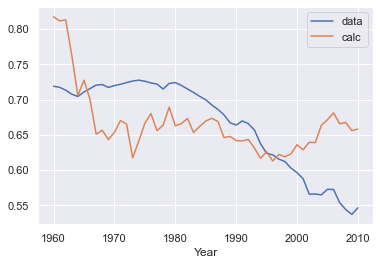

In [ ]:
agri_labour.plot()

In [ ]:
def func_1(X, a, a_bar, sigma, alpha):
          Ya_La, theta = X 
          term_1 = a_bar / Ya_La
          term_2 = (((1-a)*(1-theta)) / ((a*(1-alpha)*sigma) + ((1-(a*(1-alpha)))*(1-theta))))
          term_3 = ((a*(1-alpha)*sigma) / ((a*(1-alpha)*sigma) + ((1-(a*(1-alpha)))*(1-theta))))
          La_N_calc = (term_2 * term_1) + term_3
          return La_N_calc

parameters, covariance = curve_fit(func_1, (Ya_La, theta), La_N, bounds=([0, 0, 0, 0], [+1, +np.inf, +1, +1]))
parameters

array([3.25337922e-01, 3.70928753e+02, 8.38997027e-01, 7.27683530e-02])

In [ ]:
a = parameters[0]
a_bar = parameters[1]
sigma = parameters[2]
alpha = parameters[3]

for i in range(0, len(ind_prod.index)):
          term_1 = a_bar / Ya_La
          term_2 = (((1-a)*(1-theta)) / ((a*(1-alpha)*sigma) + ((1-(a*(1-alpha)))*(1-theta))))
          term_3 = ((a*(1-alpha)*sigma) / ((a*(1-alpha)*sigma) + ((1-(a*(1-alpha)))*(1-theta))))
          La_N_calc = (term_2 * term_1) + term_3

In [ ]:
agri_labour_1 = pd.DataFrame(index= ind_prod.index, columns=('data', 'calc')) 
agri_labour_1.data = df_emp_ind.agri_share 
agri_labour_1.calc = La_N_calc
agri_labour_1.head(3)

,data,calc
Year,,
1960,0.72,0.82
1961,0.72,0.81
1962,0.71,0.81


In [ ]:
Ya_La

Year
1960      574.91
1961      592.30
1962      603.28
1963      709.73
1964      863.53
1965      845.89
1966      968.69
1967    1,193.32
1968    1,217.82
1969    1,327.95
1970    1,352.76
1971    1,336.78
1972    1,421.66
1973    1,812.21
1974    1,922.83
1975    1,852.56
1976    1,842.05
1977    2,120.22
1978    2,134.25
1979    2,118.68
1980    2,581.11
1981    2,850.98
1982    2,977.42
1983    3,508.30
1984    3,670.24
1985    3,864.72
1986    4,058.29
1987    4,469.08
1988    5,436.25
1989    5,950.84
1990    6,803.94
1991    7,831.58
1992    8,181.21
1993    9,516.79
1994   11,153.19
1995   12,251.38
1996   14,306.27
1997   15,158.63
1998   17,350.63
1999   18,856.11
2000   18,341.14
2001   19,419.60
2002   19,947.42
2003   21,242.25
2004   21,659.91
2005   23,783.50
2006   26,445.64
2007   31,986.14
2008   35,635.45
2009   42,098.01
2010   49,664.28
Name: agri, dtype: float64

RuntimeError: Can not put single artist in more than one figure

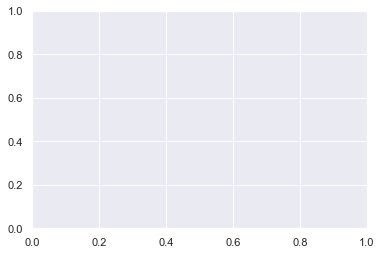

In [ ]:
agri_labour_1.plot(figure=(20,5))

<AxesSubplot:xlabel='Year'>

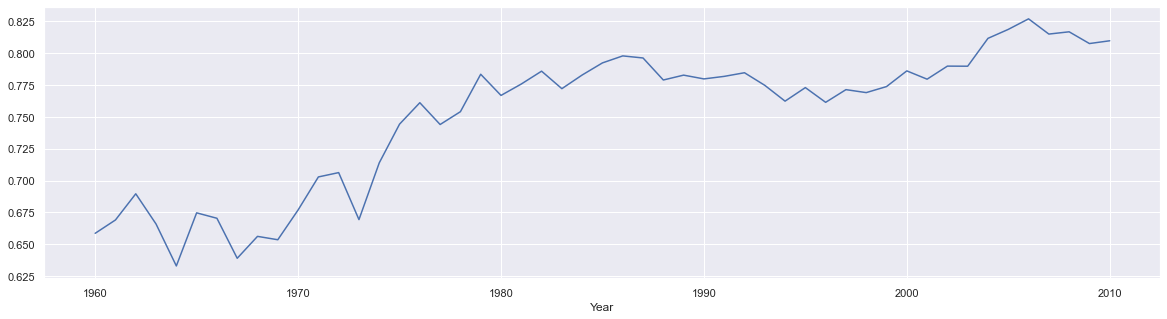

In [ ]:
theta.plot(figsize =(20,5))

<AxesSubplot:xlabel='Year'>

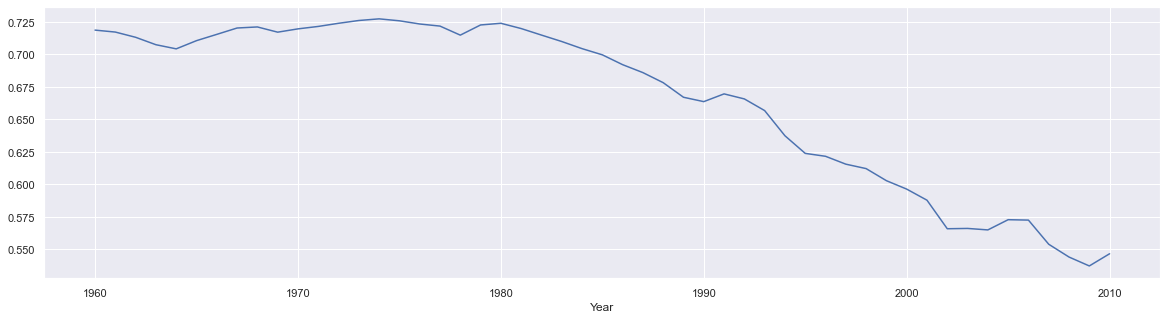

In [ ]:
La_N.plot(figsize =(20,5))

In [ ]:
La_N = df_emp_ind.agri_share 
Ya_La = ind_prod.agri 
# create theta (similar to tau for agri vs non-agri)
theta = ind_prod.theta
alpha = 0.4 # from paper 
sigma = 0.5 # for India assumed as for US = 0.7 (from literature)

t1 = 1 - theta
t2 = 1 - alpha

a, a_bar = symbols('a, a_bar', real=True)

# La_N.iloc[0] - ((((1 - a) * (1 - theta))/ ((a * (1 - alpha) * sigma)) + ((1 - (a*(1-alpha)))(1-theta))) * (a_bar/ Ya_La.iloc[0])) - ((a*(1-alpha)*sigma) / ((a * (1-alpha) * sigma) + (1 - (a * (1-alpha))(1-theta)))),
# La_N.iloc[0] - (((1-a)*t1)/(a*t2*sigma + (1-(a*t2))*t1) * (a_bar/Ya_La)), 

# term 1 == > (( ((1-a)(1-theta)) / ( )) * (a_bar / Ya_La))

"""
def func(X, a, a_bar):
          Ya_La, theta = X 
          term_1 = a_bar / Ya_La
          term_2 = (((1-a)*(1-theta)) / ((a*(1-alpha)*sigma) + ((1-(a*(1-alpha)))*(1-theta))))
          term_3 = ((a*(1-alpha)*sigma) / ((a*(1-alpha)*sigma) + ((1-(a*(1-alpha)))*(1-theta))))
          La_N_calc = (term_2 * term_1) + term_3
          return La_N_calc
""";

# equal to zero below 
nonlinsolve([
          La_N.iloc[0] - ((((1-a)*(1-theta)) / ((a*(1-alpha)*sigma) + ((1-(a*(1-alpha)))*(1-theta))))* (a_bar / Ya_La)) - ((a*(1-alpha)*sigma) / ((a*(1-alpha)*sigma) + ((1-(a*(1-alpha)))*(1-theta))))
          ],  
          [a, a_bar])

TypeError: Expecting 'to_replace' to be either a scalar, array-like, dict or None, got invalid type 'function'

In [ ]:
cs_bar = 1552.7
ca_bar = cs_bar*1.19882550170111
A_a_1960 = cs_bar*2.72492536161198
A_m_1960 = cs_bar*2.68025445404457
A_s_1960 = cs_bar*2.9618753930565
A_a_1960, A_m_1960, A_s_1960

In [ ]:
cs_bar = 1552.7
ca_bar = cs_bar*1.19882550170111

A_a, A_m, A_s = symbols('A_a, A_m, A_s', real=True)

n_a = df_ind_eff.agri_share_eff
n_m = df_ind_eff.manu_share_eff
n_s = df_ind_eff.service_share_eff

tau_m = ind_prod.tau_m
tau_s = ind_prod.tau_s

pa_pm_data = price_ind.agri_price / price_ind.manu_price
ps_pm_data = price_ind.service_price / price_ind.manu_price

parameters = pd.DataFrame(index=df_ind_eff.index, columns = ['A_a', 'A_m', 'A_s'])
parameters.iloc[0]['A_a'] = A_a_1960
parameters.iloc[0]['A_m'] = A_m_1960
parameters.iloc[0]['A_s'] = A_s_1960

# equal to zero below 

for i in range(1, len(df_ind_eff.index)):
          parameter = list(nonlinsolve([ 
                    pa_pm_data.iloc[i] - ((1 - tau_m.iloc[i]) * (A_m/A_a)), 
                    ps_pm_data.iloc[i] - (((1 - tau_m.iloc[i])/(1- tau_s.iloc[i])) * (A_m/A_s)),
                    #((A_a * n_a.iloc[i] - ca_bar) / (A_m * n_m.iloc[i])) - ((lambda_a / lambda_m) * ((A_a/A_m)/(1-tau_m.iloc[i]))**rho), 
                    #((A_s * n_s.iloc[i] + cs_bar) / (A_m * n_m.iloc[i])) - ((lambda_s / lambda_m) * ((A_s*(1-tau_s.iloc[i])) / (A_m *(1-tau_m.iloc[i])) )**rho),
                    n_a.iloc[i] - (ca_bar/A_a) - ((1 + (cs_bar / A_s) - (ca_bar/ A_a)) / (1 + ( (lambda_m/lambda_a) * ((1 - tau_m.iloc[i])**rho) * ((A_a/A_m)**(1-rho)) ) + ((lambda_s/lambda_a) * ((1 - tau_s.iloc[i])**rho) * ((A_a/A_s)**(1-rho))))),
                    ],  
                    [A_a, A_m, A_s]))
          print(i)
          parameters.iloc[i]['A_a'] = parameter[0][0]
          parameters.iloc[i]['A_m'] = parameter[0][1]
          parameters.iloc[i]['A_s'] = parameter[0][2]

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, a_bar):
          return ((((1 - a) * (1 - theta))/ ((a * (1 - alpha) * sigma)) + ((1 - (a*(1-alpha)))(1-theta))) * (a_bar/ Ya_La)) - ((a*(1-alpha)*sigma) / ((a * (1-alpha) * sigma) + (1 - (a * (1-alpha))(1-theta))))

popt, pcov = curve_fit(func, (Ya_La, theta), La_N)
popt